## Проект "Прогнозирование температуры звезд"

Перед нами cтоит задача от обсерватории «Небо на ладони»: с помощью нейросети определять температуру на поверхности обнаруженных звёзд. 


Обычно для расчёта температуры учёные пользуются следующими методами:
Закон смещения Вина.
Закон Стефана-Больцмана.
Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.
В базе обсерватории есть характеристики уже изученных 240 звёзд.

Данные находятся в файле /datasets/6_class.csv. 


***Характеристики / признаки***

Температура Temperature (K) - температуры поверхности звезд.

Относительная светимость L/Lo — светимость звезды относительно Солнца.

Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.

Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.

Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
Тип звезды.


Основные этапы работы будут такие:

 - Загрузка данны и исследовательский анализ. По поставленной задаче - решаем задачу линейной регрессии.
 
 - Подготовка данных к построению модели: 
корректировки порезультатам исследовательского анализа, категоризируйте исходные данные, подготовка обучающей и тестовой выборки, масштабирование количественных данных.
 
 - Построение простой модели нейронной сети — baseline. 
Создание класс для задания архитектуры нейронной сети.
Выбор количество скрытых слоёв, количество нейронов на них, функции активации на скрытых и выходном слоях. Попробуем и сравним несколько подобных комбинаций.Проведение обучения нейронной сети. Создание функцию для обучения нейронной сети.Проведение обучение модели.Построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах. Выводы.

 - Улучшение сети
Решение с перебором параметров нейросети. Список параметров для перебора должен включать как минимум «dropout» и «размер батча». Архитектуру нейронной сети: количество слоёв, нейронов, вид функции активации — оставьте как в Baseline, чтобы сравнить результат.
Проведение бучения нейронной сети. Выведение метрики RMSE и график «Факт — прогноз». Метрика RMSE не должна превышать 4500.
Вывод в виде таблицы или графика.

 - Выводы по проекту
Описание результатом каждого типа модели.
Выводы по сравнению двух  наилучших моделей.

## Методы расчета темпераутры звезды:

***1) Закон смещения Вина.***

***2) Закон Стефана-Больцмана.***

***3) Спектральный анализ.***

## Загрузка данных

In [1]:
!pip install -U skorch

In [2]:
#тут будуь все импорты
import pandas as pd
import torch
import torch.nn as nn


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import torch.nn as nn
from skorch import NeuralNetRegressor
import random
from math import ceil



In [3]:
#загрузка данных
data = pd.read_csv('/datasets/6_class.csv')
data.head(20)

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.120,0,Red
1,1,3042,0.000500,0.1542,16.600,0,Red
2,2,2600,0.000300,0.1020,18.700,0,Red
3,3,2800,0.000200,0.1600,16.650,0,Red
4,4,1939,0.000138,0.1030,20.060,0,Red
5,5,2840,0.000650,0.1100,16.980,0,Red
6,6,2637,0.000730,0.1270,17.220,0,Red
7,7,2600,0.000400,0.0960,17.400,0,Red
8,8,2650,0.000690,0.1100,17.450,0,Red
9,9,2700,0.000180,0.1300,16.050,0,Red


In [4]:
#колонка Unnamed дублирует номер по порядку, ее можно удалить
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red


## Предобработка и анализ данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


Пропусков в данных нет. Проверим уникальность, наличие дубликатов и проанализируем разброс данных.

In [6]:
#проверка на наличие полных дубликатов
print(data.duplicated().sum())

0


Полных дубликатов нет. Проверим наличие неявных дубликатов для этого необходимо проанализировать уникальные значения признаков.
колонках Temperature (K),Luminosity(L/Lo), Radius(R/Ro)  у нас количесвенные признаким - у ни проверим разброс данных. Их уникальнсть мы смотреть не будем.

Изучим уникальность категориальных данных в колонках Star type и Star color.

In [7]:
data['Star type'].unique()


array([0, 1, 2, 3, 4, 5])

In [8]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [9]:
#поменяем тип данных в колонке Star type, потому что хоть он и выражен в цифрах по сути это качественные переменные
data['Star type'] = data['Star type'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    object 
 5   Star color              240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


Есть неявные дубликаты в признаках Star color, чтобы он низх избавится приведем все данные в этой колонке к нижнему регистру.

In [10]:
data['Star color'] = data['Star color'].str.lower()
data['Star color'].unique()

array(['red', 'blue white', 'white', 'yellowish white',
       'pale yellow orange', 'blue', 'blue-white', 'whitish',
       'yellow-white', 'orange', 'white-yellow', 'blue ', 'yellowish',
       'orange-red', 'blue white '], dtype=object)

In [11]:
#заменим неявные дубликаты в колонке Star color
data['Star color'] = data['Star color'].replace('blue white', 'blue-white')
data['Star color'] = data['Star color'].replace('blue ', 'blue')
data['Star color'] = data['Star color'].replace('blue white ', 'blue-white')

Мы заменили неявные дубликаты. Теперь проанализируем разброс количественнызх данных с помощь диаграммы размаха и гистрогамм.

In [12]:
print(data.describe()) 

       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)
count       240.000000        240.000000    240.000000              240.000000
mean      10497.462500     107188.361635    237.157781                4.382396
std        9552.425037     179432.244940    517.155763               10.532512
min        1939.000000          0.000080      0.008400              -11.920000
25%        3344.250000          0.000865      0.102750               -6.232500
50%        5776.000000          0.070500      0.762500                8.313000
75%       15055.500000     198050.000000     42.750000               13.697500
max       40000.000000     849420.000000   1948.500000               20.060000


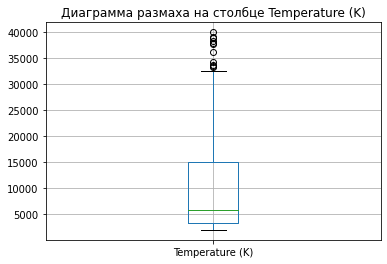

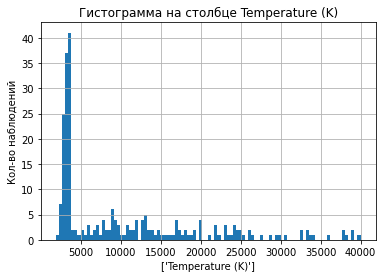

In [13]:
data.boxplot(column=['Temperature (K)'])
plt.title(f'Диаграмма размаха на столбце Temperature (K)')
plt.show()
data['Temperature (K)'].plot(kind='hist', bins=100, grid=True)
plt.title(f'Гистограмма на столбце Temperature (K)')
plt.xlabel(['Temperature (K)'])
plt.ylabel('Кол-во наблюдений')
plt.show()

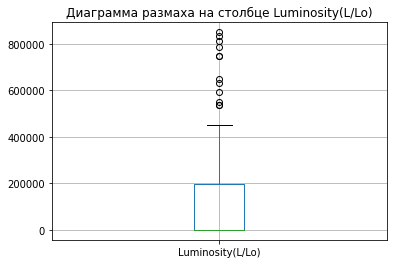

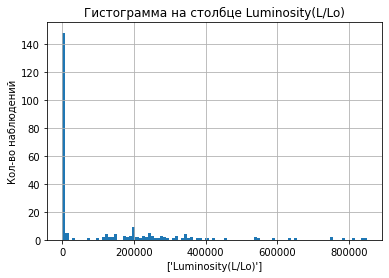

In [14]:
data.boxplot(column=['Luminosity(L/Lo)'])
plt.title(f'Диаграмма размаха на столбце Luminosity(L/Lo)')
plt.show()
data['Luminosity(L/Lo)'].plot(kind='hist', bins=100, grid=True)
plt.title(f'Гистограмма на столбце Luminosity(L/Lo)')
plt.xlabel(['Luminosity(L/Lo)'])
plt.ylabel('Кол-во наблюдений')
plt.show()

In [15]:
#посмотрим на данные, где есть выбросы - в данном случае очень большие значения
display(data.loc[data['Luminosity(L/Lo)'] > 600000].sort_values(by=['Luminosity(L/Lo)']))

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
172,4287,630000.0,1315.0,-9.200,5,orange
232,32489,648430.0,1948.5,-10.840,5,blue
234,21904,748490.0,1130.0,-7.670,5,blue-white
229,21738,748890.0,92.0,-7.346,4,blue
227,10930,783930.0,25.0,-6.224,4,blue
101,40000,813000.0,14.0,-6.230,4,blue
236,30839,834042.0,1194.0,-10.630,5,blue
233,27739,849420.0,1252.0,-7.590,5,blue-white


In [16]:
#посмотрим детальнее на данные, где есть выбросы - в данном случае очень низкие значения, стремящиеся к нулю.
display(data.loc[data['Luminosity(L/Lo)'] <50].sort_values(by=['Luminosity(L/Lo)']))

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
29,7230,0.000080,0.01300,14.080,2,pale yellow orange
25,12990,0.000085,0.00984,12.230,2,yellowish white
147,14732,0.000110,0.00892,12.890,2,white
27,7700,0.000110,0.01280,14.470,2,yellowish white
4,1939,0.000138,0.10300,20.060,0,red
...,...,...,...,...,...,...
35,8052,8.700000,1.80000,2.420,3,whitish
219,8250,9.250000,1.93000,-0.980,3,yellow-white
216,9320,29.000000,1.91000,1.236,3,blue-white
151,8945,38.000000,2.48700,0.120,3,blue-white


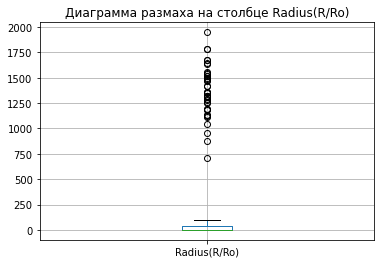

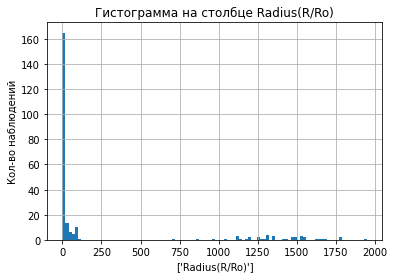

In [17]:
data.boxplot(column=['Radius(R/Ro)'])
plt.title(f'Диаграмма размаха на столбце Radius(R/Ro)')
plt.show()
data['Radius(R/Ro)'].plot(kind='hist', bins=100, grid=True)
plt.title(f'Гистограмма на столбце Radius(R/Ro)')
plt.xlabel(['Radius(R/Ro)'])
plt.ylabel('Кол-во наблюдений')
plt.show()

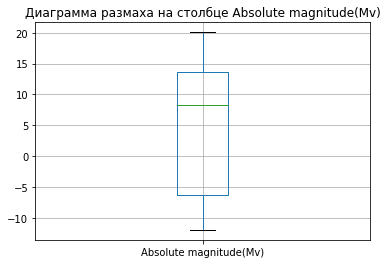

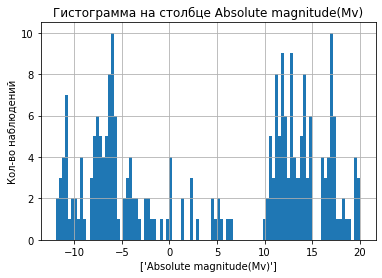

In [18]:
data.boxplot(column=['Absolute magnitude(Mv)'])
plt.title(f'Диаграмма размаха на столбце Absolute magnitude(Mv)')
plt.show()
data['Absolute magnitude(Mv)'].plot(kind='hist', bins=100, grid=True)
plt.title(f'Гистограмма на столбце Absolute magnitude(Mv)')
plt.xlabel(['Absolute magnitude(Mv)'])
plt.ylabel('Кол-во наблюдений')
plt.show()

In [ ]:
#построим тепловую карту корреляции  - проверим корреляцию данных 
print ('Признаки')
upp_mat = np.triu(data.corr())
sns.heatmap(data.corr(), annot = True)

***ВЫВОДЫ по предобработке и анализу данных***

Мы проанализировали датасет из 240 данных о звездных телах. В данных у нас 6 признаков: 4 - количественных (Temperature (K)	, uminosity(L/Lo),	Radius(R/Ro), Absolute magnitude(Mv)) и 2 категориальных - Star type и Star color.

По категориальным данным мы проверили уникальность значений и удалили неявные дубликаты по признаку Star color.

В количественных данных было изучено распреление данных и выборосы с помощью графиков гистрограмм и диаграмм размаха. Посмотрим, что можно отметить:

Температуры поверхности обычных звезд Temperature (K)  - среднее значение примерно 6000 К, но есть выбросы, где темпераутра достигает 40 тыс. В открытых источниках указано, что "Температура горячих звезд достигает 50 000 К", значит имеющие значения не являются аномалиями.

Относительная светимость L/Lo Luminosity(L/Lo)  - зависит  от температуры и радиуса звезды. Среднее значение светимости составялет около 0 люмен, есть данные, где светимость равна 600 тыс люмен, эти данные мы рассмотрели более детально. Так звезды со светимостью более 600 тыс люминов 0, как правило, имеют большой радиус, что соответсвует данным по срезам вышще. , что соответствует информации  в сети. А планеты со светимостью близкой к нулю - имеют маленький радиус. Тут корретирвать в данных тоже ничего не будем.

Относительный радиус R/Ro - среднее значение  около нуля, есть звезды, которые превышают радиус Солнца в 2000 раз - это гипергиганты, что тоже естестенно для нашей вселенной.

Абсолютная звёздная величина Mv - среднее значение около 7 Mv, у нас гистрограмма  двухмодального типа с двумя вершинами. Это обычно происходит, когда смешиваются две различные группы данных, например, данные звезд карликов и гипергигантов, что соответствует нашей ситуации. В данных также ничего корректировать не будем. 

По корреляции данных: у нас есть сильная обратная зависимость между типом звезды (Star type) и Абсолютная звёздная величина. Как видим наш целевой признак (Temperature) имеет низкую корреляцию со всеми остальными.

Переходим к подготовке данных к обучению.

### Подготовка данных

***Кодирование качестенных признаков***

In [20]:
# так как get_dummies() , который работает до разбиения данных на выборки, слелаем копию изначального датасета, 
#потом закодируем его и разобьем на выборки 

#сделаем копию датасета
data1 = data.copy()

#кодируем прищнаки данных техникой OHE 
data1 = pd.get_dummies(data1, drop_first=True)

data1.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type_1,Star type_2,Star type_3,Star type_4,Star type_5,Star color_blue-white,Star color_orange,Star color_orange-red,Star color_pale yellow orange,Star color_red,Star color_white,Star color_white-yellow,Star color_whitish,Star color_yellow-white,Star color_yellowish,Star color_yellowish white
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


***Разделение на выборки***

In [21]:
# Разделим данные на выборки
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.drop('Temperature (K)', axis = 1),
                                                    data1['Temperature (K)'],
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=1)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(168, 19) (72, 19) (168,) (72,)


***Масштабирование количесвенных признаков***

In [22]:
#масштабирование данных для моделей

#выделим количественные признаким

numeric=['Luminosity(L/Lo)','Radius(R/Ro)', 'Absolute magnitude(Mv)']

#создадим объект стандартизации и обучим его для моделей Л
scaler = StandardScaler()    
scaler.fit(X_train1[numeric])

#сохраним преобразованные обучающую и тестовую  выборки в переменные
X_train1[numeric] = scaler.transform(X_train1[numeric])
X_test1[numeric] = scaler.transform(X_test1[numeric])


features_train_scaled = scaler.transform(X_train1[numeric])
features_test_scaled = scaler.transform(X_test1[numeric])


pd.options.mode.chained_assignment = None

In [23]:
#сбросим индексы, чтобы в дальнейшем было проще сопостовлять данные в target и prediction

X_train1 = X_train1.reset_index(drop=True)
X_test1 = X_test1.reset_index(drop=True)

print('Проверка выполения стандартизации')
print(' ')
print('Обучающая выборка')
print(X_train1.head())
print('Тестовая выборка')
print(X_test1.head())

Проверка выполения стандартизации
 
Обучающая выборка
   Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  Star type_1  \
0         -0.560864     -0.404550                1.207543            0   
1          0.504620      2.904125               -1.570978            0   
2          1.312749     -0.340610               -1.064657            0   
3          1.256032     -0.242155               -1.154008            0   
4         -0.560864     -0.404092                0.695457            1   

   Star type_2  Star type_3  Star type_4  Star type_5  Star color_blue-white  \
0            0            0            0            0                      0   
1            0            0            0            1                      0   
2            0            0            1            0                      0   
3            0            0            1            0                      0   
4            0            0            0            0                      0   

   Star color_orange

## Построение базовой нейронной сети

Для определения темпераутры на поверхности небесных тел будет использовать модель линейной регрессии.

In [24]:
#X_train = torch.FloatTensor(X_train.values)

# преобразуем признаки и целевые значения в тензоры
X_train = torch.Tensor(X_train1.values)
X_test = torch.Tensor(X_test1.values)
y_train = torch.Tensor(y_train1.values)
y_test = torch.Tensor(y_test1.values)

In [25]:
print(X_train.shape[1])

19


In [26]:
print(X_train)

tensor([[-0.5609, -0.4046,  1.2075,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5046,  2.9041, -1.5710,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.3127, -0.3406, -1.0647,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.5609, -0.4048,  0.8338,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.4872,  2.4975, -1.4336,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5609, -0.4027, -0.1981,  ...,  1.0000,  0.0000,  0.0000]])


***Базовая нейронная сеть с 2 скрытыми слоями*** 

In [27]:
#нейронная сеть  со скрытым слоем
#объявляем объект класса


# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 14 # 2/3 от входного слоя + выходной + округление
hidden_size_2 = 10 # 1/2 от входного слоя с округлением
out_size = 1  
# количество эпох
num_epochs = 1000
# скорость обучения
learn = 0.2


# класс нейронной сети (Создайте класс для задания архитектуры нейронной сети)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2)  
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out



# создание нейронной сети
model = Net(input_size, hidden_size_1, hidden_size_2, out_size)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
pred_test = []
best_predicted_temp = []
# лучший скор
best_rmse = 4500


In [28]:
# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    # перевод сети в режим предсказания
    model.eval()
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        pred_test.append(test_preds)
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
        
        
        # сохранение лучшего результата
        if rmse < best_rmse:
            best_rmse = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
print(f'Best RMSE test {best_rmse}')
        

Эпоха №0, RMSE на тестовой выборке: 14774.255988035404
Эпоха №30, RMSE на тестовой выборке: 9101.134434783391
Эпоха №60, RMSE на тестовой выборке: 8060.155085356609
Эпоха №90, RMSE на тестовой выборке: 6875.605864212986
Эпоха №120, RMSE на тестовой выборке: 5870.983563254116
Эпоха №150, RMSE на тестовой выборке: 5465.185815688246
Эпоха №180, RMSE на тестовой выборке: 5391.172785211025
Эпоха №210, RMSE на тестовой выборке: 5433.196112786653
Эпоха №240, RMSE на тестовой выборке: 5482.470793355857
Эпоха №270, RMSE на тестовой выборке: 5459.113297963324
Эпоха №300, RMSE на тестовой выборке: 5398.491270716291
Эпоха №330, RMSE на тестовой выборке: 5337.80722769191
Эпоха №360, RMSE на тестовой выборке: 5265.719324080994
Эпоха №390, RMSE на тестовой выборке: 5193.845973842505
Эпоха №420, RMSE на тестовой выборке: 5068.695690214594
Эпоха №450, RMSE на тестовой выборке: 4966.987215606659
Эпоха №480, RMSE на тестовой выборке: 4871.4673354134275
Эпоха №510, RMSE на тестовой выборке: 4765.505639488

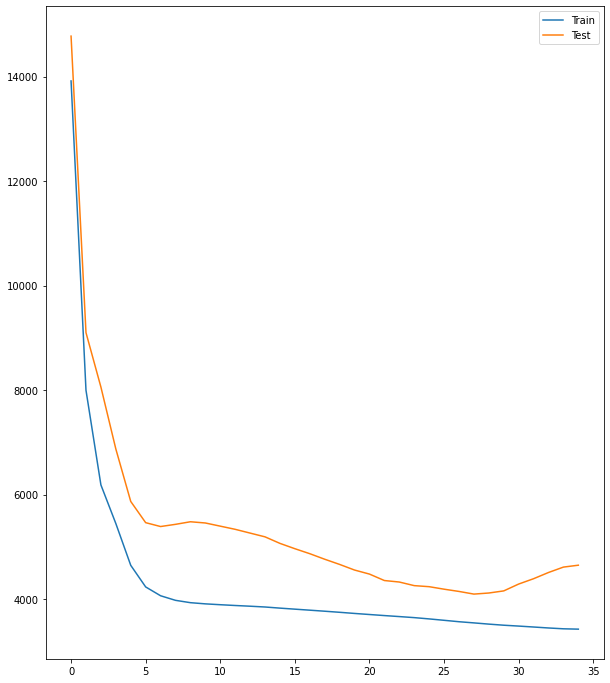

In [29]:
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

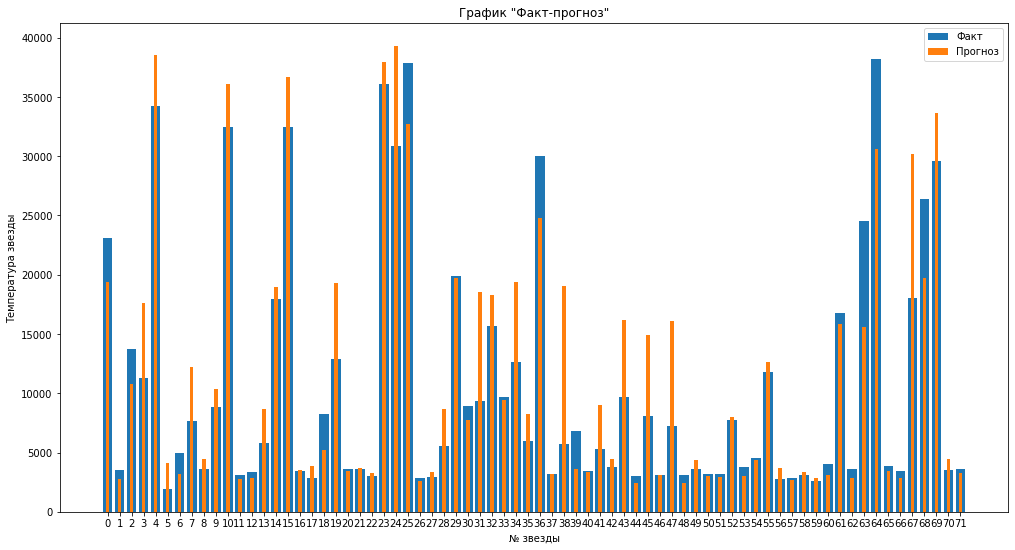

In [30]:
# функция для вывода качества регрессии факт-прогноз
#построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, 
#а по вертикальной — температура в Кельвинах.
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

***Вывод:***
Обучение проходило на базовой нейронной сети с 2 скрытыми слоями.
На эпохе 840 достишнут лучший показатель метрики RMSE  = 4229 К, что соответствует порогу (менее 4500К), установленному заказчиком.
После 840 эпохи качество модели ухудшается, так как модель переобучается.

Стоит отметить, что точноть модели лучше определяте для звезд с температурой ниже 10000К, скорее всего это связано  с тем, что данных в этим  звездам в выборках больше и модель там лучше обучилась, а данных по звездам с температурой выше немного и, соответственно, по ним показатели точности хуже. 

***Базовая нейронная сеть с 1 скрытым слоем***

In [31]:
#нполносвязную нейронную сеть из двух полносвязных слоёв
#объявляем объект класса

# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 14 # 2/3 от входного слоя + выходной + округление
#hidden_size_2 = 10 # 1/2 от входного слоя с округлением
out_size = 1 

# количество эпох
num_epochs = 2000
# скорость обучения
learn = 0.2


# класс нейронной сети (Создайте класс для задания архитектуры нейронной сети)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_1, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        return out


# создание нейронной сети
model = Net(input_size, hidden_size_1, out_size)

# инициализация весов и смещений
#model.apply(init_weights)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
pred_test1= []
best_predicted_temp = []
# лучший скор
best_rmse2 = 4500

In [32]:
# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    # перевод сети в режим предсказания
    model.eval()
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        pred_test1.append(test_preds)
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
    
        # сохранение лучшего результата
        if rmse < best_rmse2:
            best_rmse2 = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
        else:
            best_predicted_temp = test_preds

print(f'Best RMSE test {best_rmse2}')

Эпоха №0, RMSE на тестовой выборке: 14773.95221327049
Эпоха №30, RMSE на тестовой выборке: 13713.989353940742
Эпоха №60, RMSE на тестовой выборке: 10454.169694432934
Эпоха №90, RMSE на тестовой выборке: 8773.799177095405
Эпоха №120, RMSE на тестовой выборке: 8252.060106421912
Эпоха №150, RMSE на тестовой выборке: 7834.433738311915
Эпоха №180, RMSE на тестовой выборке: 7479.975668409624
Эпоха №210, RMSE на тестовой выборке: 7158.155907774013
Эпоха №240, RMSE на тестовой выборке: 6868.851432372082
Эпоха №270, RMSE на тестовой выборке: 6607.513904639172
Эпоха №300, RMSE на тестовой выборке: 6376.262227982786
Эпоха №330, RMSE на тестовой выборке: 6180.199349535579
Эпоха №360, RMSE на тестовой выборке: 6024.086652763222
Эпоха №390, RMSE на тестовой выборке: 5902.348007361138
Эпоха №420, RMSE на тестовой выборке: 5809.538363760067
Эпоха №450, RMSE на тестовой выборке: 5734.926852192624
Эпоха №480, RMSE на тестовой выборке: 5671.354688255708
Эпоха №510, RMSE на тестовой выборке: 5612.11867301

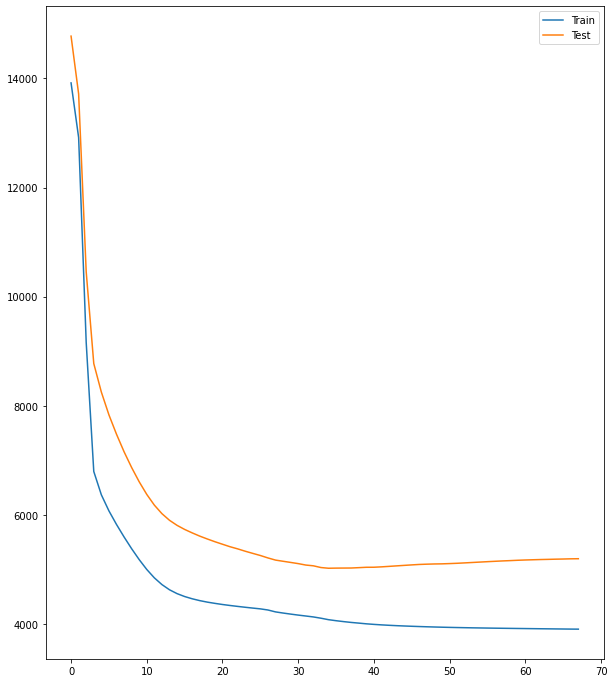

In [33]:
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

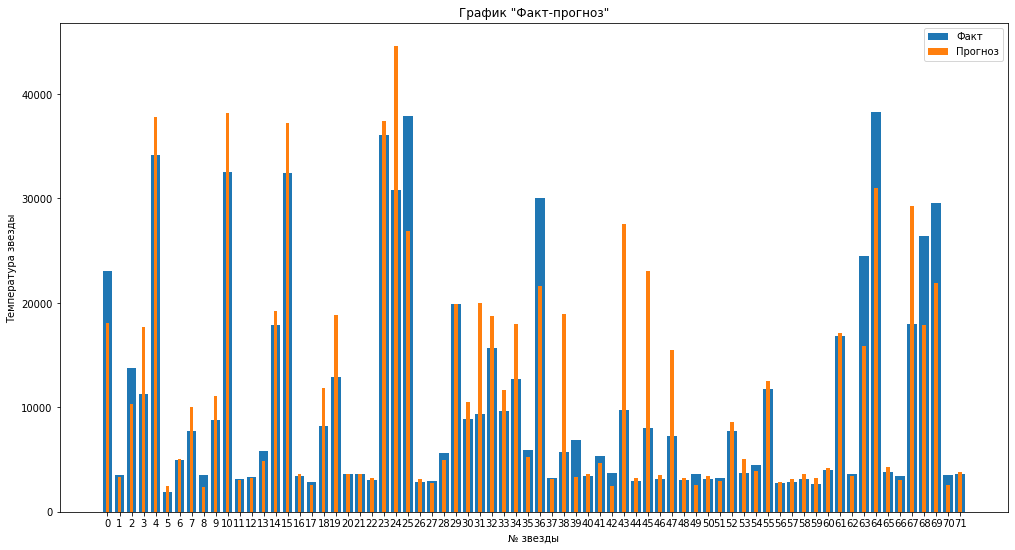

In [34]:
# функция для вывода качества регрессии факт-прогноз
#построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, 
#а по вертикальной — температура в Кельвинах.
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test1.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

***Вывод:***

После уменьшения числа скрытых слоев с 1 до 0, точность предсказания стала хуже, требуемое значение RMSE ниже 4500К не было достигнуто, а минимальное составило 4979К. 

Изначально обучение было провелено на 1000 эпох, так как показатели RMSE к 1000 эпохи по тенденции уменьшался и переобучение не наступало, было принято решение, увеличить количество эпох до 2000. Но в графику видно, что после 1230 эпохи стало происходить переобучение модели.

Поэтому делаем вывод, что для решения этой задачи полносвязную нейронную сеть из двух полносвязных слоёв не подходит и далее улучшение нейросети будем проводить на сети с одним скрытым слоем сети, которая показала лучше метрику качества RMSE.

## Улучшение нейронной сети

Улучшение модели сначала проведем с помощью метода регуляризации 'BatchNorm', а потом - с 'dropout'.

### Метод BatchNorm

In [35]:
# преобразуем признаки и целевые значения в тензоры
X_train = torch.Tensor(X_train1.values)
X_test = torch.Tensor(X_test1.values)
y_train = torch.Tensor(y_train1.values)
y_test = torch.Tensor(y_test1.values)

In [44]:
#нейронная сеть  с 2 скрытыми слоями
#объявляем объект класса

# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 14 # 2/3 от входного слоя + выходной + округление
hidden_size_2 = 10 # 1/2 от входного слоя с округлением
out_size = 1 
# количество эпох
num_epochs = 1000
# скорость обучения
learn = 0.4


# класс нейронной сети (Создайте класс для задания архитектуры нейронной сети)
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.bn1 = nn.BatchNorm1d(hidden_size_1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.bn2 = nn.BatchNorm1d(hidden_size_2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [45]:
# создание нейронной сети
model = Net(input_size, hidden_size_1, hidden_size_2, out_size)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
pred_test2= []
best_predicted_temp = []
# лучший скор
best_rmse = 4500

In [46]:
# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    #перевод сети в режим предсказания
    model.eval()
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        pred_test2.append(test_preds)
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
        # сохранение лучшего результата
        if rmse < best_rmse:
            best_rmse = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
print(f'Best RMSE test {best_rmse}')            
           

Эпоха №0, RMSE на тестовой выборке: 14761.532711747788
Эпоха №30, RMSE на тестовой выборке: 7705.868153556742
Эпоха №60, RMSE на тестовой выборке: 5145.672745132554
Эпоха №90, RMSE на тестовой выборке: 5031.706867455615
Эпоха №120, RMSE на тестовой выборке: 5029.320232397217
Эпоха №150, RMSE на тестовой выборке: 5242.062189634915
Эпоха №180, RMSE на тестовой выборке: 4910.816429067574
Эпоха №210, RMSE на тестовой выборке: 5012.82934080146
Эпоха №240, RMSE на тестовой выборке: 4675.74742688268
Эпоха №270, RMSE на тестовой выборке: 4516.37974488417
Эпоха №300, RMSE на тестовой выборке: 4374.650157441164
Эпоха №330, RMSE на тестовой выборке: 4285.972001775093
Эпоха №360, RMSE на тестовой выборке: 4586.792997291244
Эпоха №390, RMSE на тестовой выборке: 4126.8949586826175
Эпоха №420, RMSE на тестовой выборке: 5228.2593661753235
Эпоха №450, RMSE на тестовой выборке: 5436.994022435559
Эпоха №480, RMSE на тестовой выборке: 6077.249706898672
Эпоха №510, RMSE на тестовой выборке: 4925.5403764460

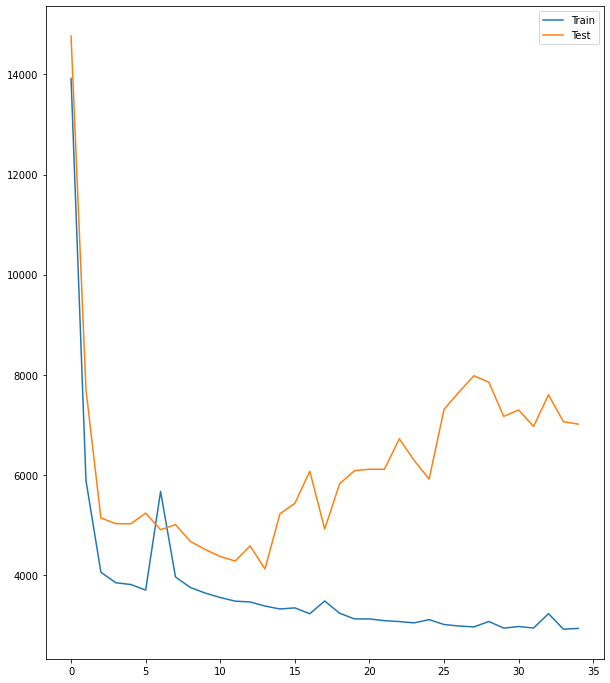

In [47]:
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

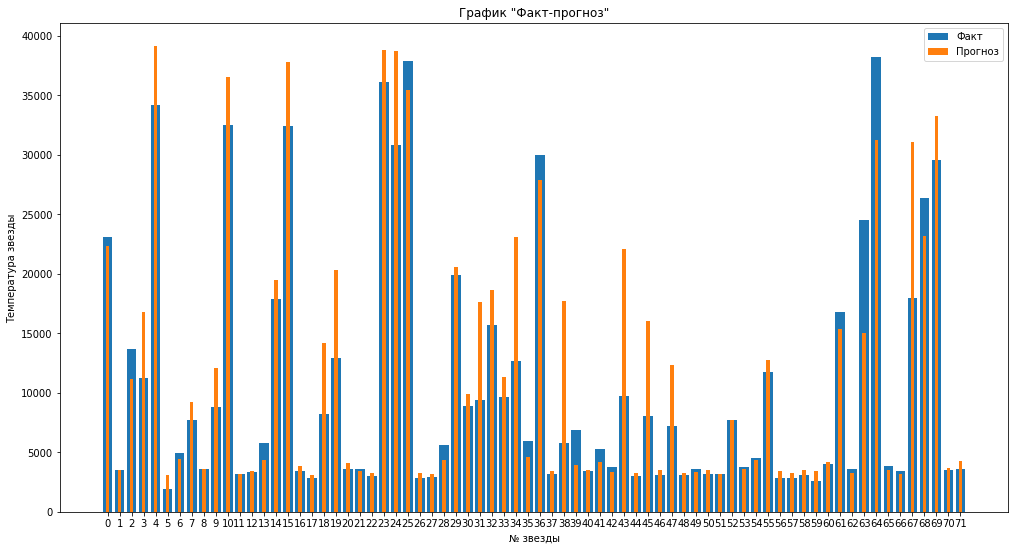

In [48]:
# функция для вывода качества регрессии факт-прогноз
#построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, 
#а по вертикальной — температура в Кельвинах.
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test2.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

***Вывод:***

Мы провели улучшение нейросети с двуями скрытыми слоями с помощью метода регуляризации BatchNorm., добавим его в виде дополнительного слоя сети.

Наилучший показатель RMSE был достигнут на 720 эпохи и он составил 3752К, что лучше, чт лучше, чем было при построении базовой нейросети.

### Метод DropOut

In [49]:
# преобразуем признаки и целевые значения в тензоры
X_train = torch.Tensor(X_train1.values)
X_test = torch.Tensor(X_test1.values)
y_train = torch.Tensor(y_train1.values)
y_test = torch.Tensor(y_test1.values)

In [50]:
#нейронная сеть  с 1 скрытым слоем
#объявляем объект класса

# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 14 # 2/3 от входного слоя + выходной + округление
hidden_size_2 = 10 # 1/2 от входного слоя с округлением
out_size = 1 
# количество эпох
num_epochs = 1000
# скорость обучения
learn = 0.2


# класс нейронной сети и добавляем регуляризацию  DropOut как еще один из слоёв
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.dp1 = nn.Dropout(p=0.3)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p=0.3)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dp1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dp2(out)
        out = self.fc3(out)
        return out

In [51]:
# создание нейронной сети
model = Net(input_size, hidden_size_1, hidden_size_2, out_size)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
pred_test3 = [] 
# лучший скор
best_rmse = 4500

In [52]:

# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    #перевод сети в режим предсказания
    model.eval()
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        pred_test3.append(test_preds)
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
        # сохранение лучшего результата
        if rmse < best_rmse:
            best_rmse = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
            
            print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {best_rmse}')
print(f'Best RMSE test {best_rmse}')

Эпоха №0, RMSE на тестовой выборке: 14773.064678664343
Эпоха №30, RMSE на тестовой выборке: 8860.548064312952
Эпоха №60, RMSE на тестовой выборке: 7361.548750093285
Эпоха №90, RMSE на тестовой выборке: 6320.346825926565
Эпоха №120, RMSE на тестовой выборке: 5659.410923408902
Эпоха №150, RMSE на тестовой выборке: 5367.679386848659
Эпоха №180, RMSE на тестовой выборке: 5313.9776062757355
Эпоха №210, RMSE на тестовой выборке: 5384.212662961967
Эпоха №240, RMSE на тестовой выборке: 5397.170925586848
Эпоха №270, RMSE на тестовой выборке: 5362.025736603658
Эпоха №300, RMSE на тестовой выборке: 5254.833774725895
Эпоха №330, RMSE на тестовой выборке: 5153.884166335134
Эпоха №360, RMSE на тестовой выборке: 5019.907369663309
Эпоха №390, RMSE на тестовой выборке: 4902.050999326711
Эпоха №420, RMSE на тестовой выборке: 4797.436815633949
Эпоха №450, RMSE на тестовой выборке: 4727.181401215739
Эпоха №480, RMSE на тестовой выборке: 4640.84496616726
Эпоха №510, RMSE на тестовой выборке: 4580.400419177

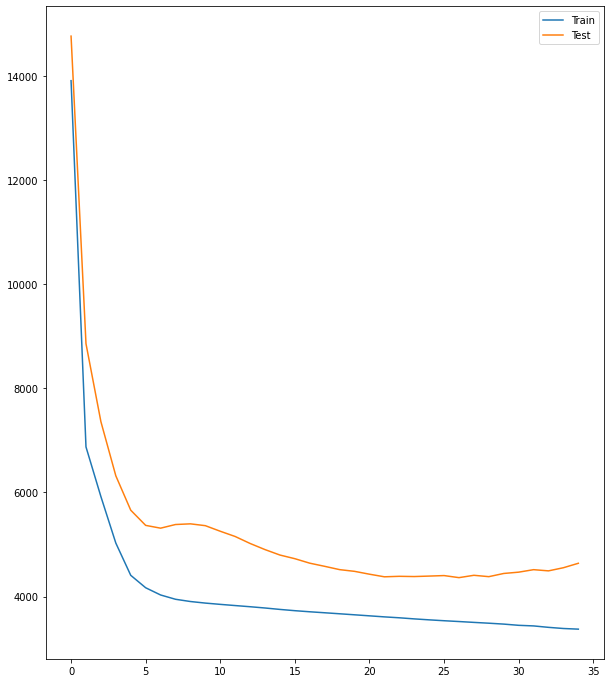

In [53]:
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

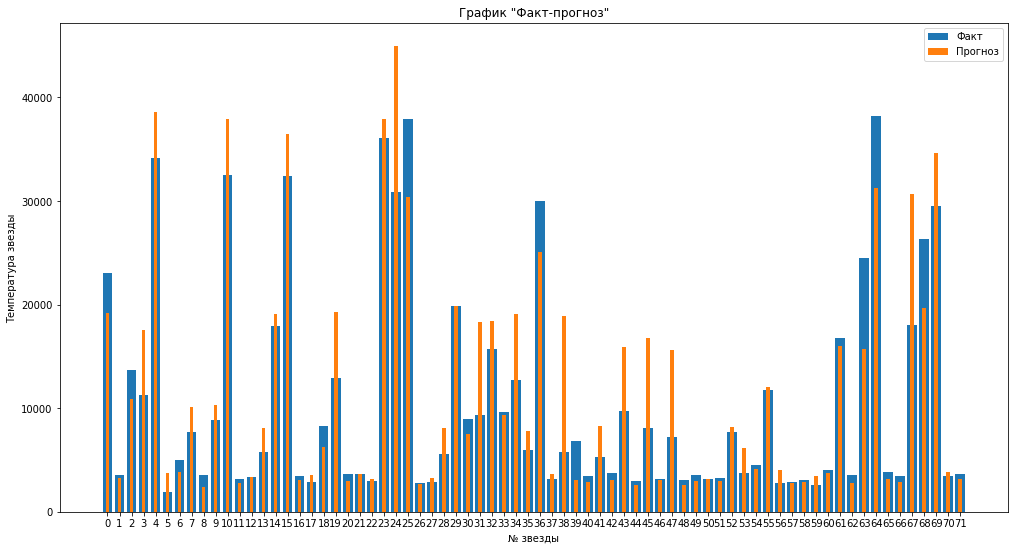

In [54]:
# функция для вывода качества регрессии факт-прогноз
#построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, 
#а по вертикальной — температура в Кельвинах.
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test3.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

***Вывод:***

Мы улучшили базовую нейросеть с помощью техники регуляризации Dropout, при этом удалось достичь лучшей метрики RMSE = 4232 на 630 эпохе.И на данный момент это лучший показатель  RMSE по 4 обученным моделям.

### Обучением с батчами

In [55]:
# преобразуем признаки и целевые значения в тензоры
X_train = torch.Tensor(X_train1.values)
X_test = torch.Tensor(X_test1.values)
y_train = torch.Tensor(y_train1.values)
y_test = torch.Tensor(y_test1.values)

In [56]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 14
n_hidden_neurons_2 = 10
n_out_neurons = 1 

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_out_neurons), 
    nn.ReLU()
)


optimizer = torch.optim.Adam(net.parameters(), lr=0.2)

loss = nn.BCELoss()

batch_size = 250

num_epochs = 1000

num_batches = ceil(len(X_train)/batch_size)

for epoch in range(num_epochs):
	order = np.random.permutation(len(X_train))
	for batch_idx in range(num_batches):
		start_index = batch_idx * batch_size # посчитайте номер стартового объекта батча
		optimizer.zero_grad()
  
		batch_indexes = order[start_index:start_index+batch_size] # извлеките индексы объектов текущего обатча
		X_batch = X_train[batch_indexes]
		y_batch = y_train[batch_indexes]
  
		preds = net.forward(X_batch).flatten()
	        
		loss_value = loss(preds, y_batch)

		loss_value.backward()
	        
		optimizer.step()
		
	if epoch % 30 == 0 or epoch == num_epochs - 1:
		net.eval()
		test_preds = net.forward(X_test)
		rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
		print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
       

Эпоха №0, RMSE на тестовой выборке: 14775.041116694058
Эпоха №30, RMSE на тестовой выборке: 14775.041116694058
Эпоха №60, RMSE на тестовой выборке: 14775.041116694058
Эпоха №90, RMSE на тестовой выборке: 14775.041116694058
Эпоха №120, RMSE на тестовой выборке: 14775.041116694058
Эпоха №150, RMSE на тестовой выборке: 14775.041116694058
Эпоха №180, RMSE на тестовой выборке: 14775.041116694058
Эпоха №210, RMSE на тестовой выборке: 14775.041116694058
Эпоха №240, RMSE на тестовой выборке: 14775.041116694058
Эпоха №270, RMSE на тестовой выборке: 14775.041116694058
Эпоха №300, RMSE на тестовой выборке: 14775.041116694058
Эпоха №330, RMSE на тестовой выборке: 14775.041116694058
Эпоха №360, RMSE на тестовой выборке: 14775.041116694058
Эпоха №390, RMSE на тестовой выборке: 14775.041116694058
Эпоха №420, RMSE на тестовой выборке: 14775.041116694058
Эпоха №450, RMSE на тестовой выборке: 14775.041116694058
Эпоха №480, RMSE на тестовой выборке: 14775.041116694058
Эпоха №510, RMSE на тестовой выборке

***Вывод***

Как видим эксперимент с батчами не удался. Метрика RMSE стала еще хуже, видимо это связано  с тем, что изначально наша выборка была небольшого размера.


### Перебор параметра у Dropout (уменьшением p c 0.3 до 0.2)

In [57]:
# преобразуем признаки и целевые значения в тензоры
X_train = torch.Tensor(X_train1.values)
X_test = torch.Tensor(X_test1.values)
y_train = torch.Tensor(y_train1.values)
y_test = torch.Tensor(y_test1.values)

In [67]:
#нейронная сеть  с 1 скрытым слоем
#объявляем объект класса

# количество слоев и нейронов
input_size = X_train.shape[1]
hidden_size_1 = 14 # 2/3 от входного слоя + выходной + округление
hidden_size_2 = 10 # 1/2 от входного слоя с округлением
out_size = 1 
# количество эпох
num_epochs = 1000
# скорость обучения
learn = 0.2


# класс нейронной сети и добавляем регуляризацию  DropOut как еще один из слоёв
class Net(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)  
        self.dp1 = nn.Dropout(p=0.2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p=0.2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size_2, out_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.dp1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dp2(out)
        out = self.fc3(out)
        return out
    


In [68]:
# создание нейронной сети

dropout = [0.2, 0.3, 0.4, 0.5]

    
model = Net(input_size, hidden_size_1, hidden_size_2, out_size)

# В качестве функции потерь используем MSE
loss = nn.MSELoss()  
# создаем Adam оптимизатор 
optimizer = torch.optim.Adam(model.parameters(), lr=learn)  

# списки для сохранения 
train_lost = []
test_lost = []
pred_test3 = [] 
# лучший скор
best_rmse = 4500

In [69]:

# Цикл обучения
for epoch in range(num_epochs):
    
    model.train()
    
    optimizer.zero_grad()
    
    #перевод сети в режим предсказания
    model.eval()
    preds = model.forward(X_train).flatten()
            
    loss_value = loss(preds, y_train)

    loss_value.backward()
            
    optimizer.step()
    
    # на каждой 30-й эпохе предсказываем температуру на тестовой выборке
    if epoch % 30 == 0 or epoch == num_epochs - 1:
        model.eval()
        test_preds = model.forward(X_test).flatten()
        rmse = ((test_preds.squeeze(-1) - y_test).pow(2).mean().item())**0.5
        
        # внесение метрики качества в заранее созданные списки
        train_lost.append(loss_value.item()**0.5)
        test_lost.append(rmse)
        pred_test3.append(test_preds)
        print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {rmse}')
        # сохранение лучшего результата
        if rmse < best_rmse:
            best_rmse = rmse
            best_predicted_temp = test_preds
            best_train_loss = loss_value
            
            print(f'Эпоха №{epoch}, RMSE на тестовой выборке: {best_rmse}')
print(f'Best RMSE test {best_rmse}')

Эпоха №0, RMSE на тестовой выборке: 14774.031812609583
Эпоха №30, RMSE на тестовой выборке: 8935.845567152557
Эпоха №60, RMSE на тестовой выборке: 7793.077697546714
Эпоха №90, RMSE на тестовой выборке: 6594.7506397133775
Эпоха №120, RMSE на тестовой выборке: 5686.084065505891
Эпоха №150, RMSE на тестовой выборке: 5730.491950958486
Эпоха №180, RMSE на тестовой выборке: 5667.848974699308
Эпоха №210, RMSE на тестовой выборке: 5597.3193584072005
Эпоха №240, RMSE на тестовой выборке: 5584.116760956919
Эпоха №270, RMSE на тестовой выборке: 5489.268985939749
Эпоха №300, RMSE на тестовой выборке: 5423.8606176781495
Эпоха №330, RMSE на тестовой выборке: 5372.756834251853
Эпоха №360, RMSE на тестовой выборке: 5352.846345637057
Эпоха №390, RMSE на тестовой выборке: 5378.160280244538
Эпоха №420, RMSE на тестовой выборке: 5361.689472545011
Эпоха №450, RMSE на тестовой выборке: 5351.813337552049
Эпоха №480, RMSE на тестовой выборке: 5368.777887005571
Эпоха №510, RMSE на тестовой выборке: 5358.403680

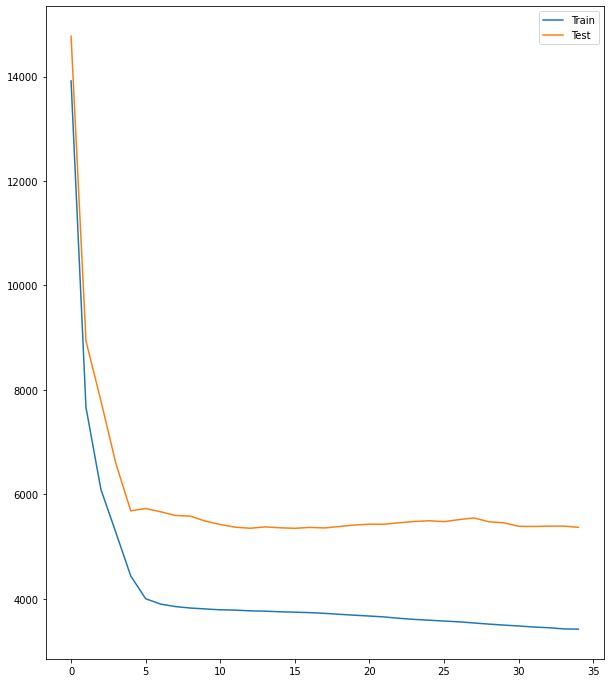

In [70]:
# график метрики качества        
df_gr = pd.DataFrame({'Train': train_lost, 'Test': test_lost})       
df_gr.plot(figsize=(10, 12))
plt.show();

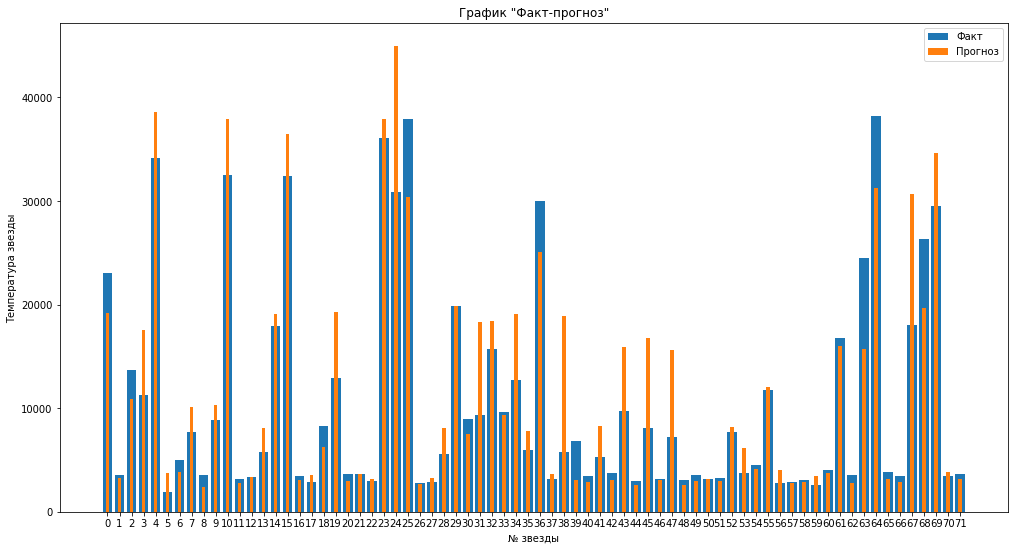

In [71]:
# функция для вывода качества регрессии факт-прогноз
#построение графика «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, 
#а по вертикальной — температура в Кельвинах.
def predcit_fact_graph(pred_test, y_test, detach=True):
    
    if detach:
        y1 = torch.FloatTensor(pred_test)
        y1 = y1.detach().numpy().reshape([-1])
        y2 = y_test.detach().numpy().reshape([-1])
    else:
        y1 = pred_test3.reshape([-1])
        y2 = y_test.reshape([-1])
    x = np.arange(len(y1))

    fig, ax = plt.subplots(figsize=(17, 9))
    ax.set_xticks(x)
    fact = ax.bar(x, y2, width = 0.8, label = 'Факт')
    forecast = ax.bar(x, y1, width = 0.3, label = 'Прогноз')
    ax.legend()
    ax.set_title('График "Факт-прогноз"')
    ax.set_xlabel('№ звезды')
    ax.set_ylabel('Температура звезды')
    plt.show()
    
# вывод графика
predcit_fact_graph(best_predicted_temp, y_test)

## Выводы

Мы проанализировали 6 моделей - 2 из них базовые: первая с 1 скрытым слоем, вторая без скрытых слоев. И две улучшенные модели - с подбором гиперпараметров и регуляризацией с помощью Dropout и Batchnorm, и еще на двух провели эксперимент с батчами и умеьшили Dropout/ На основе этого можно сделать следующие выводы:

1) лучшее качество модели №3,где использовали метод регуляции BatchNorm  =- ее RMSE составляет  3772К

2) следом идет базовая модель с 1 скрытым слоем - ее RMSE составляет   4229К.

3) на третьем месте модель с регуляцией DropOut = 0.2 и RMSE = 4230К.

4)  за ней модель с регуляцией DropOut = 0.3  и RMSE  = 4525.

5) на предпоследнем месте у нас базовая модель без скрытых слоев, где RMSE = 4978К, что уже выше уровня, допустимого заказчиком.

6) на последнем месте модель, где экспериментировали с батчами тут RMSE = 14 775К.

Поэтому заказчику мы рекомендуем использовать модель №3 улучшенную с помощью техники регуляции Dropout.